<center> 
    <h1> 
        Data Camp Project

 <center>
    <h1> 
        Prediction of the engagement rate on Instagram

# Table of content
1. [Introduction](#Introduction)
    - [Growing influence of Instagram](#See_later)
    - [Definition of the problem : Quantify the reaction to a post](#See_later)
2. [Data exploration](#Data_exploration)
    - [Data Processing](#Data_Processing)
    - [See later](#See_later)
    - [See later](#See_later)
3. [Workflow](#Workflow)
4. [Submission](#Submission)

# Import

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re

# Introduction

## Growing influence of Instagram

The leading treads towards social networking services had drawn massive
public attention from last one and half decade. The amount of data that is
uploaded to these social networking services is increasing day by day. So,
there is massive requirement to study the highly dynamic behavior of users
towards these services. Let's now focus of one the most used social networks : Instagram 

Instagram is an American photo and video sharing social networking service. In 2018, Instagram has reached 1 billion monthly active users. 

## Definition of the problem : Quantify the reaction to a post

Aim : Predict the engagment rate by instagramers

Scoring : "Root mean square error" which is defined by the following formula : 

    

# Data exploration

In [41]:
df = pd.read_csv('Data/cr7.csv')
df = df = df.iloc[:1072,:]
df.shape

(1072, 17)

## Data Processing

In [42]:
df.head(2)

,Links to profile,Links to publication_gen_info,Name Account/Influencer,Professional Activity,Nationality,Brand,Account description,Number of posts,Number of followers,Number of followings,Verified Status,Links to publication_pub_info,Post description,Post number of comments,Post number of likes,Posting date,Media Type
0,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-1JhCoBpan/,Cristiano Ronaldo,Footballeur,Portugal,Non,Cristiano Ronaldo,2 982 publications,252 764 771,459,Vérifié,h,Dedication ✌️👌👍💪🏽☀️,5493.0,887 059,2015-12-03T12:56:22.000Z,Photo
1,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-1dEuSBpet/,Cristiano Ronaldo,Footballeur,Portugal,Non,Cristiano Ronaldo,2 982 publications,252 764 771,459,Vérifié,h,Job done!👌👔☀️ @sacoorbrothers,8546.0,1 064 362,2015-12-03T15:47:15.000Z,Photo


In [43]:
df['Post number of likes'] = df['Post number of likes'].apply(lambda x : x.replace(" ","")).astype(int)
df['Brand'] = df['Brand'].replace({'Non':0})
df['Verified Status'] = df['Verified Status'].replace({'Vérifié':0})
df['Media Type'] = df['Media Type'].replace({'Photo':0, 'Video':1})

#Count the number of words in the description
df['Number of words'] = pd.Series([len(re.findall(r'\w+', line)) for line in df['Post description']])

In [44]:
df['Posting date'] = df['Posting date'].apply(lambda x : x.replace(':','-'))
df['Posting date'] = df['Posting date'].apply(lambda x : x.replace('T','-'))
df['Posting date'] = df['Posting date'].apply(lambda x : x.split('-'))

df['year of posting'] = df['Posting date'].apply(lambda x : x[0])
df['month of posting'] = df['Posting date'].apply(lambda x : x[1])
df['day of posting'] = df['Posting date'].apply(lambda x : x[2])
df['hour of posting'] = df['Posting date'].apply(lambda x : x[3])

df = df.drop(columns = ['Posting date'])

In [45]:
df.head(2)

,Links to profile,Links to publication_gen_info,Name Account/Influencer,Professional Activity,Nationality,Brand,Account description,Number of posts,Number of followers,Number of followings,...,Links to publication_pub_info,Post description,Post number of comments,Post number of likes,Media Type,Number of words,year of posting,month of posting,day of posting,hour of posting
0,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-1JhCoBpan/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,h,Dedication ✌️👌👍💪🏽☀️,5493.0,887059,0,1,2015,12,03,12
1,https://www.instagram.com/cristiano/,https://www.instagram.com/p/-1dEuSBpet/,Cristiano Ronaldo,Footballeur,Portugal,0,Cristiano Ronaldo,2 982 publications,252 764 771,459,...,h,Job done!👌👔☀️ @sacoorbrothers,8546.0,1064362,0,3,2015,12,03,15


In [45]:
date_strings = []
for i in range(df.shape[0]):
    d = df.loc[i,'day of posting']
    m = df.loc[i,'month of posting']
    y =df.loc[i,'year of posting']
    date_strings.append('{}-{}-{}'.format(d,m,y))
df['Date of Posting'] = pd.Series([pd.to_datetime(date, format='%d-%m-%Y') for date in date_strings])

df['Day of the week of Posting'] = df['Date of Posting'].dt.dayofweek

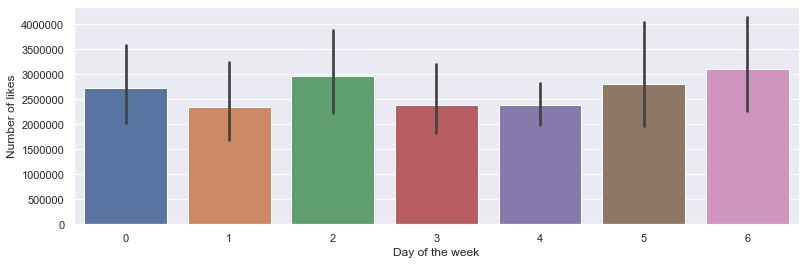

In [50]:
plt.figure(figsize=(13,4))
sns.barplot(x = 'Day of the week of Posting',y = 'Post number of likes', data = df)
plt.ylabel('Number of likes')
plt.xlabel('Day of the week')
plt.show()

# Workflow

The work flow is composed of two essential elements that make up the submission: the feature extractor and the regressor. The first allows both the preparation of initial data and the creation of new variables. The second, on the other hand, allows a supervised learning model to be trained so that the engagement rate on Instagram's post can be correctly predicted. This model is trained on a part of the base obtained from the feature extractor output, then is evaluated on the remaining part.

# Submission

In [46]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

def processing_data(X):
    
    X['Post number of likes'] = X['Post number of likes'].apply(lambda x : x.replace(" ","")).astype(int)
    X['Media Type'] = df['Media Type'].replace({'Photo':0, 'Video':1})

    X['Number of words'] = pd.Series([len(re.findall(r'\w+', line)) for line in X['Post description']])
    
    X['Posting date'] = X['Posting date'].apply(lambda x : x.replace(':','-'))
    X['Posting date'] = X['Posting date'].apply(lambda x : x.replace('T','-'))
    X['Posting date'] = X['Posting date'].apply(lambda x : x.split('-'))

    X['year of posting'] = X['Posting date'].apply(lambda x : x[0])
    X['month of posting'] = X['Posting date'].apply(lambda x : x[1])
    X['day of posting'] = X['Posting date'].apply(lambda x : x[2])
    X['hour of posting'] = X['Posting date'].apply(lambda x : x[3])
    
    date_strings = []
    for i in range(df.shape[0]):
        d, m, y = X.loc[i,'day of posting'], X.loc[i,'month of posting'], X.loc[i,'year of posting']
        date_strings.append('{}-{}-{}'.format(d,m,y))
    X['Date of Posting'] = pd.Series([pd.to_datetime(date, format='%d-%m-%Y') for date in date_strings])
    X['Day of the week of Posting'] = X['Date of Posting'].dt.dayofweek
    